# Energy_Field


In [1]:
#Librerias
import archimedes as ach
#import matplotlib.pyplot as plt
import pylab as plt
import scipy.interpolate as interpolate
import numpy as np
from scipy.integrate import simps
from scipy import interpolate 
from filon import cos_integral


In [2]:
nc0 = 5 # cicles number
ns0 = 20   # Subdivisiones en el intervalo de phi h
NP0 = 1000  # número de subsubintervalos para integrar
a0 = 2.0 
b0 = 2.0 
Long_arc_0,phi_0=  ach.Arc_Lenght(ns0,nc0,NP0,a0,b0)
sf_0 = Long_arc_0[-1]

Nelectron=501

theta_0 = np.pi 
F_grid_0 =   np.linspace(0, 2.0, 100)
camp_F_0 = ach.CAMP(F_grid_0)
#---------------------------------------------------------------------------------------------------------------
SD_grid_0 =  np.array([ach.ssfi(4*np.pi,Long_arc_0,phi_0) ]) 
#---------------------------------------------------------------------------------------------------------------
VS_0,kindex_0,SE_grid_0,SD_SF_0,Ndonor_0,phie_0,NF_0 =  ach.int_vpot(sf_0,Nelectron,SD_grid_0,camp_F_0,theta_0,a0,b0,Long_arc_0,phi_0)
COEF_0= ach.coef(VS_0,kindex_0,sf_0,NF_0,Nelectron,Ndonor_0)
Ee_0,VecR_0,ND =  ach.schr(COEF_0,sf_0,NF_0,Nelectron,Ndonor_0)

In [3]:
SD_SF_0

array([0.22906796])

# Dipolar Moment

In [4]:
x =  camp_F_0/0.17
y1 = - np.gradient(Ee_0[:,0,0], x)
t1, c1, k1 = interpolate.splrep(x, y1, s=0.0001, k=1)

N = 1000
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline1 = interpolate.BSpline(t1, c1, k1, extrapolate=True)

F= xx
DIP_mom = spline1

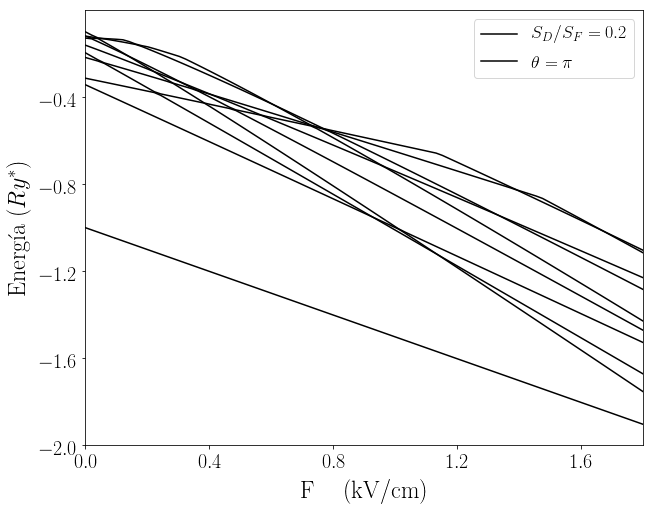

In [28]:
fig=plt.figure(figsize=(10,8) )#pi=1000)
ax = fig.add_subplot(1, 1, 1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rc('axes', labelsize=20)

plt.xlabel(r'F \, \, (kV/cm)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')
plt.ylabel(r'Energ\'ia ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')



plt.plot(camp_F_0/0.17,Ee_0[:,0,0:10], color='black')
#plt.plot(x,y1,linestyle='--',label= '$\\tilde{y}$  \, ($a_o^* $)'  )

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

#ax.set_xticklabels(x_ticks, fontsize=18)
ax.set_xlim(0, 1.8 )
ax.set_ylim(-2, 0 )

plt.yticks(np.arange(-2,0, 0.4))
plt.xticks(np.arange(0,1.7, 0.4))

plt.legend(('$S_D/S_F = 0.2$' , '$\\theta = \pi$'), loc=(0), fontsize=18)
#plt.savefig('Rs.png', format='png', dpi=1000)

plt.savefig('Arc_MDIP_pi.pdf',format='pdf', dpi=1000,bbox_inches="tight")

#plt.savefig('cartesian.png', format='png', dpi=1000)

plt.show()

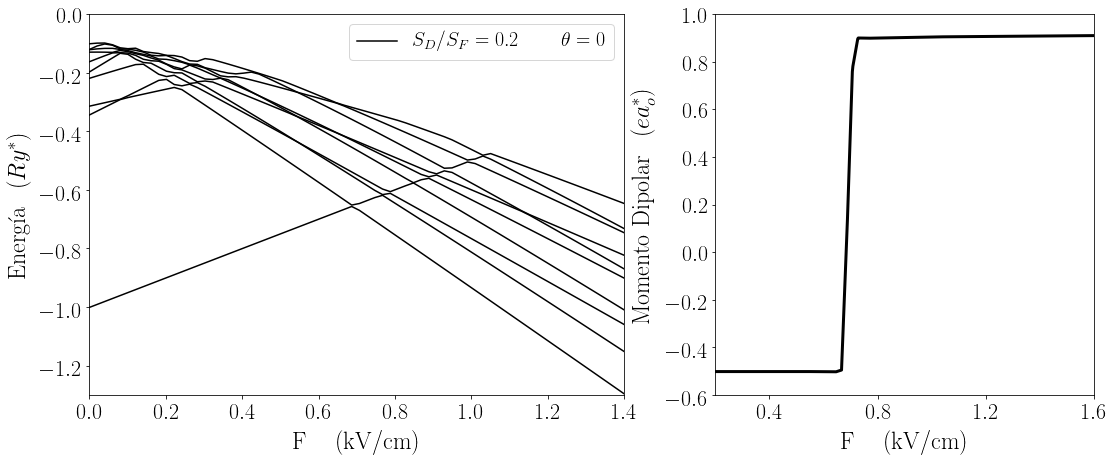

In [321]:
fig = plt.figure(figsize=(18, 7))
grid = plt.GridSpec(2, 7,  wspace=1.4, hspace=0.3)
ax1=plt.subplot(grid[0:, :4])
ax2=plt.subplot(grid[0:, 4:])

plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 
ax1.plot(camp_F_0/0.17,Ee_0[:,0,0:10], color='black')
ax2.plot(F,DIP_mom(F), color='black',linewidth=3)

ax1.set_xlabel(r'F \, \, (kV/cm)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')
ax2.set_xlabel(r'F \, \, (kV/cm)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center',)
ax1.set_ylabel(r'Energ\'ia \, ($Ry^*$)' , labelpad=8,fontsize=24,fontweight='bold', horizontalalignment='center')           
ax2.set_ylabel(r'Momento Dipolar \, ($ e a_o^*$)' , labelpad=5,fontsize=24,fontweight='bold', horizontalalignment='center')           

ax1.set_ylim(-1.3,0.0)
ax2.set_ylim(-0.6,1)

ax1.set_xlim(0,1)
ax2.set_xlim(0.2,1.4)

ax1.yaxis.set_ticks(np.arange(-1.2,0.1, 0.2))
ax1.xaxis.set_ticks(np.arange(0,1.6, 0.2))
ax2.xaxis.set_ticks(np.arange(0.4,1.6, 0.4))
ax2.yaxis.set_ticks(np.arange(-0.6,1.2, 0.2))


ax1.legend(["$S_D/S_F = 0.2 $ \, \, \quad $\\theta= 0$"], loc=(0),fontsize=20)

#plt.savefig('Arc_MDIP.pdf',format='pdf', dpi=1000,bbox_inches="tight")


In [315]:
NP= 500
Phi=np.zeros(NP)
Rs=np.zeros(NP)
Xs=np.zeros(NP)
Ys=np.zeros(NP)
Ss=np.zeros(NP)
s= np.linspace(0, sf_0, NP)
for j in range(1,NP+1):
    ss = s[j-1]
    Phi[j-1] = ach.fiss(ss,Long_arc_0,phi_0)
    Rs[j-1] = ach.rads(a0,b0,Phi[j-1])
    Xs[j-1] = ach.xss(a0,b0,Phi[j-1])
    Ys[j-1] = ach.yss(a0,b0,Phi[j-1])
    Ss[j-1] = ss
xDd=  ach.xss(a0,b0,4*np.pi)
yDd=  ach.yss(a0,b0,4*np.pi)

In [317]:
SD_grid_0, Ss[114], xDd, yDd

(array([50.43988736]), 50.30533660122054, 6.0, -2.9391523179536475e-15)

C:\Users\USUARIO\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


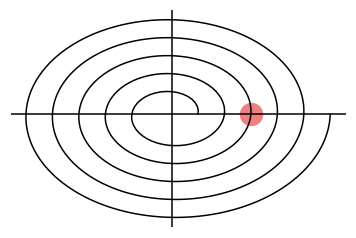

In [319]:

plt.plot(Xs,Ys, color="black", linewidth=1.5, linestyle="-")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(6.0, -2.9391523179536475e-15, s=500, color='lightcoral')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
plt.box(False)
#plt.title( 'a=2 \, b=2.0 \, nf= 5')
#plt.grid(True)
plt.savefig('spiralSDSF0-2.pdf',format='pdf', dpi=1000,bbox_inches="tight")